<a href="https://colab.research.google.com/github/PeaceUdoka/alx_project_2/blob/main/wrangle_act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Wrangling and Analyze Data
## Table Of Contents
<ul>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analyse">Analysing and Visualising Data</a></li>

</ul>

<a id = "gather"></a>
## Data Gathering
Gather **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
weRateDogs = pd.read_csv("twitter-archive-enhanced.csv")


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
import os

In [3]:
imgPred = 'image_predictions.tsv'
if not os.path.exists(imgPred):
    os.makedirs(imgPred)


In [4]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open(os.path.join(imgPred, url.split('/')[-1]), mode = 'wb') as imgPred:
    imgPred.write(response.content)

In [7]:
twtImgPred = pd.read_csv("image-predictions.tsv", sep = "\t") 

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [9]:
import tweepy
twtJson = pd.read_json('tweet-json.txt', lines = True)

<a id = "assess"></a>
## Assessing Data
Using both visual and programmatic assessement, let's assess the data and find out issues in the data.



In [11]:
#display any five rows in the weRateDogs dataset and visually assess
weRateDogs.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
2110,670444955656130560,NaN,NaN,2015-11-28 03:31:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paull. He just stubbed his toe. 10/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670444955...,10,10,Paull,None,None,None,None
608,797971864723324932,NaN,NaN,2016-11-14 01:18:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/797971864...,12,10,None,None,None,pupper,None
1034,745057283344719872,NaN,NaN,2016-06-21 00:54:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's downright gorgeous as hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745057283...,12,10,Oliver,None,None,None,None
2124,670374371102445568,NaN,NaN,2015-11-27 22:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Daisy. She's rebellious. Full of teen ang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670374371...,12,10,Daisy,None,None,None,None


To understand the dataset, a brief description of each column is given below:

**tweet_id** - unique identifier for each tweet

**in_reply_to_status_id** -  original Tweet’s ID, If the represented Tweet is a reply

**in_reply_to_user_id**	-  original Tweet author’s ID, If the represented Tweet is a reply

**timestamp**	- time at which tweet was made

**source**	- Utility used to post the Tweet, as an HTML-formatted string. 

**text** - The actual UTF-8 text of the status update.

**retweeted_status_id** - ID of original Tweet that was retweeted.

**retweeted_status_user_id** - ID of author of the original Tweet that was retweeted.

**retweeted_status_timestamp**	- time at which retweet was made

**expanded_urls**	

**rating_numerator** - numerator of dog rating	

**rating_denominator**	- denominator of dog rating, whuch is always 10.

**name** - name of dog

**doggo** - if dog is at doggo stage

**floofer**	- if dog is at floofer stage

**pupper** - if dog is at pupper stage

**puppo** - if dog is at puppo stage

In [12]:
#display any five rows in the twtImgPred dataset and visually assess
twtImgPred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1203,741438259667034112,https://pbs.twimg.com/media/CkoeKTPWYAAcWmo.jpg,1,Chesapeake_Bay_retriever,0.292675,True,redbone,0.197858,True,vizsla,0.150312,True
1205,741793263812808706,https://pbs.twimg.com/media/CkthBj7WgAAsIGb.jpg,1,kuvasz,0.311325,True,French_bulldog,0.115349,True,Labrador_retriever,0.068533,True
719,685906723014619143,https://pbs.twimg.com/media/CYTUhn7WkAEXocW.jpg,1,Yorkshire_terrier,0.414963,True,briard,0.063505,True,Pekinese,0.053682,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,golden_retriever,0.705092,True,Labrador_retriever,0.219721,True,kuvasz,0.015965,True
869,697616773278015490,https://pbs.twimg.com/media/Ca5uv7RVAAA_QEg.jpg,1,Lhasa,0.521931,True,Shih-Tzu,0.403451,True,Tibetan_terrier,0.039912,True


**tweet_id** - unique idenifier for each tweet

**jpg_url** - url of image

**img_num** - image number that corresponded to the most confident prediction

**p1** - the algorithm's first prediction for the image in the tweet 

**p1_conf** - how confident the algorithm is in its first prediction

**p1_dog** - whether or not the first prediction is a breed of dog 

**p2** - the algorithm's second most likely prediction 

**p2_conf** - how confident the algorithm is in its second prediction 

**p2_dog** - whether or not the second prediction is a breed of dog 

**p3** - the algorithm's third most likely prediction

**p3_conf** -  how confident the algorithm is in its third prediction 

**p3_dog** - whether or not the second prediction is a breed of dog 

In [13]:
#display any twtJson dataset and visually assess
twtJson

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [14]:
#get information on every column
weRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The information above shows that there are a few missing data on some columns. However, these columns with missing data are not relevant for the analysis.

In [15]:
#get information on every column
twtJson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [16]:
#get information on every column
twtImgPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#summary statistics
weRateDogs.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Quality issues
After visual and programmatic assessments, the following quality issues were found

`weRateDogs`

1. Timestamp has unnecessary values +0000 

2. Some entries are retweets and not original Tweets.

3. Timestamp has wrong datatype

4. Maximum rating denominator is 170. Further visual assessment shows that there are entries with rating denominators that are not equal to 10.

`twtJson`

5. `twtJson` is incomplete. Has 2354 rows instead of 2356 just like `weRateDogs` dataset.

6. `twtJson` has columns which will not be useful for analysis.

`twtImgPred`

7. tweet_id has the wrong datatype on all files. It also occurs as "id" and not "tweet_id" on `twtJson` file.

8. All files have columns that will not be useful for analysis.


### Tidiness issues
After visual and programmatic assessments, the following tidiness issues were found:

1. In `weRateDogs` file, the dog stages are in four different columns instead of one.

2. The data in three diferent files is not ideal as they contain similar information. The id, favorite_count and retweet_count columns in the `twtJson` file should be included in the `weRateDogs` file and the prediction with the highest confidence should be left in the `twtImgPred` file. The other columns are either already present in the `weRateDogs` file or are not useful for analysis. This will leave only one table.

<a id = "clean"></a>
## Cleaning Data
All issues documented in the assessment section will be cleaned here.
But first, we must make copies of the original data to avoid tampering as a result of cleaning.

In [18]:
# Make copies of original pieces of data
weRateDogsClean = weRateDogs.copy()

In [19]:
twtImgPredClean = twtImgPred.copy()

In [20]:
twtJsonClean = twtJson.copy()

Great! Now we can perform the cleaning operations on these copies.

### Issue #1: Tidiness
In `weRateDogs` file, the dog stages are in four different columns instead of one.

In [21]:
#display any five rows of the copy dataset
weRateDogsClean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
803,772152991789019136,NaN,NaN,2016-09-03 19:23:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a couple rufferees making sure all the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772152991...,10,10,None,None,None,None,None
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,None,None,None,None
2174,669216679721873412,NaN,NaN,2015-11-24 18:11:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,None,None,None,None
252,844973813909606400,NaN,NaN,2017-03-23 18:07:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brady. He's a recovering alcoholic. De...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844973813...,12,10,Brady,None,None,None,None
1808,676897532954456065,NaN,NaN,2015-12-15 22:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676897532...,5,10,None,None,None,None,None


### Define: Collapse the four columns into one and name it dog_stage

#### Code

In [22]:
#retain only necessary columns
weRateDogsClean = weRateDogsClean[["tweet_id","timestamp","source","text","retweeted_status_id","retweeted_status_timestamp","expanded_urls","rating_numerator","rating_denominator","name", "puppo", "pupper", "floofer", "doggo"]]

In [23]:
#replace every instance of None in the different dog stages columns with nothing
weRateDogsClean["doggo"].replace("None","", inplace=True)

In [24]:
weRateDogsClean["puppo"].replace("None","", inplace=True)

In [25]:
weRateDogsClean["pupper"].replace("None","", inplace=True)

In [26]:
weRateDogsClean["floofer"].replace("None","", inplace=True)

In [27]:
#combine all four columns into called "dog_stage"
weRateDogsClean["dog_stage"] = weRateDogsClean["puppo"]+weRateDogsClean["pupper"]+weRateDogsClean["floofer"]+weRateDogsClean["doggo"]

In [28]:
#drop the four different dog stage columns as they're now irrelevant
weRateDogsClean = weRateDogsClean.drop(["puppo", "pupper", "floofer", "doggo"], axis = 1)

#### Test

In [29]:
#to check if all dog_stages are now in one column
weRateDogsClean.head(10)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Issue #2: Tidiness
The data in three diferent files is not ideal as they contain similar information. The id, favorite_count and retweet_count columns in the twtJson file should be included in the weRateDogs file and the prediction with the highest confidence should be left in the twtImgPred file. The other columns are either already present in the weRateDogs file or are not useful for analysis. This will leave only one table.

#### Define: Join twtJson and twtImgPred tables to weRateDogs and remove unnecessary columns


In [30]:
#display columns
twtJsonClean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [31]:
#display columns
twtImgPredClean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [32]:
#count the number of times first prediction was higher than other predictions
((twtImgPredClean["p1_conf"] > twtImgPredClean["p2_conf"]) & (twtImgPredClean["p1_conf"] > twtImgPredClean["p3_conf"])).count()

2075

This shows that in all entries the first predictions had higher confidence so only the p1_conf column will be retained.

#### Code

In [33]:
#retain only relevant columns
twtJsonClean = twtJsonClean[['id','favorite_count', 'retweet_count']]


In [34]:
#retain only relevant columns
twtImgPredClean = twtImgPredClean[['tweet_id','p1', 'p1_conf','p1_dog']]

In [35]:
#merge all three datasets into one master dataset
weRateDogsClean = weRateDogsClean.merge(twtJsonClean, left_on = "tweet_id", right_on = "id", how = "left", validate = "one_to_one")
weRateDogsClean = weRateDogsClean.merge(twtImgPredClean, on = "tweet_id", how = "left", validate = "one_to_one")


#### Test

In [36]:
#check number of rows and columns of master dataset
weRateDogsClean.shape

(2356, 17)

In [37]:
#display first 5 lines of master daraset
weRateDogsClean.head(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,favorite_count,retweet_count,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8.924206e+17,39467.0,8853.0,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,8.921774e+17,33819.0,6514.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,8.918152e+17,25461.0,4328.0,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,8.916896e+17,42908.0,8964.0,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,8.913276e+17,41048.0,9774.0,basset,0.555712,True


### Issue 3 and 4: Quality
- In weRateDogs, Timestamp and retweeted_timestamp has unnecessary values +0000

- Timestamp and retweeted_timestampchas wrong datatype



#### Define: Resolve both issues by changing the datatype to datetime

In [38]:
#get information on columns datatype
weRateDogsClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_timestamp  181 non-null    object 
 6   expanded_urls               2297 non-null   object 
 7   rating_numerator            2356 non-null   int64  
 8   rating_denominator          2356 non-null   int64  
 9   name                        2356 non-null   object 
 10  dog_stage                   2356 non-null   object 
 11  id                          2354 non-null   float64
 12  favorite_count              2354 non-null   float64
 13  retweet_count               2354 

#### Code

In [39]:
#change datatype to datetime
weRateDogsClean["timestamp"] = pd.to_datetime(weRateDogsClean["timestamp"])
weRateDogsClean["retweeted_status_timestamp"] = pd.to_datetime(weRateDogsClean["retweeted_status_timestamp"])

#### Test

In [40]:
#check if timestamp still contains +0000
weRateDogsClean.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,favorite_count,retweet_count,p1,p1_conf,p1_dog
577,800855607700029440,2016-11-22 00:17:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,2016-11-22 00:10:52+00:00,https://twitter.com/littlewiewel/status/800852...,11,10,None,,8.008556e+17,0.0,1889.0,NaN,NaN,NaN
1508,691483041324204033,2016-01-25 04:49:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,NaT,https://twitter.com/dog_rates/status/691483041...,5,10,None,,6.914830e+17,2608.0,656.0,bloodhound,0.886232,True
408,823581115634085888,2017-01-23 17:20:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Crawford. He's quite h*ckin good at th...,NaN,NaT,https://twitter.com/dog_rates/status/823581115...,11,10,Crawford,,8.235811e+17,14376.0,3031.0,dingo,0.280949,False
1286,708400866336894977,2016-03-11 21:15:02+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaT,https://vine.co/v/iHFqnjKVbIQ,12,10,None,,7.084009e+17,17516.0,11330.0,NaN,NaN,NaN
1341,704847917308362754,2016-03-02 01:56:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Yes hi could I get a number 4 with no pickles...",NaN,NaT,https://twitter.com/dog_rates/status/704847917...,12,10,None,,7.048479e+17,5594.0,1727.0,golden_retriever,0.857240,True


In [41]:
#check dataype of timestamp
weRateDogsClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   timestamp                   2356 non-null   datetime64[ns, UTC]
 2   source                      2356 non-null   object             
 3   text                        2356 non-null   object             
 4   retweeted_status_id         181 non-null    float64            
 5   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 6   expanded_urls               2297 non-null   object             
 7   rating_numerator            2356 non-null   int64              
 8   rating_denominator          2356 non-null   int64              
 9   name                        2356 non-null   object             
 10  dog_stage                   2356 non-null   object          

### Issue 5: Quality

Some entries are retweets and not original Tweets. This is seen for rows that have a retweeted_status_id and timestamp.


#### Define: Remove all retweets

In [42]:
#count for each column
weRateDogsClean.count()

tweet_id                      2356
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
dog_stage                     2356
id                            2354
favorite_count                2354
retweet_count                 2354
p1                            2075
p1_conf                       2075
p1_dog                        2075
dtype: int64

There are 181 records which are actually retweets and not original tweets. These will be dropped.


#### Code

In [43]:
#retain only rows where retweeted_status_timestamp is null. These are the original tweets.
weRateDogsClean = weRateDogsClean[weRateDogsClean["retweeted_status_timestamp"].isna()]


#### Test


In [44]:
#check if there are still any retweets in dataset
weRateDogsClean[weRateDogsClean["retweeted_status_timestamp"].notna()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,id,favorite_count,retweet_count,p1,p1_conf,p1_dog


### Issue 6

Maximum rating denominator is 170. Further visual assessment shows that there are entries with rating denominators that are not equal to 10.


#### Define: Remove all entries with denominators not equal to 10.

In [45]:
#check maximum rating_denominator
weRateDogsClean["rating_denominator"].max()

170

#### Code

In [46]:
#count number of rows where rating denominator is not 10
weRateDogsClean[weRateDogsClean["rating_denominator"]!=10]["rating_denominator"].count()

22

There are 22 entries so removing them would be best to avoid inconsistencies.

In [47]:
#retain only rows where rating denominator is 10
weRateDogsClean = weRateDogsClean[weRateDogsClean["rating_denominator"]==10]

#### Test

In [48]:
#check if there are rows where rating_denominator is not 10
weRateDogsClean[weRateDogsClean["rating_denominator"]!=10]["rating_denominator"].count()

0

### Issues 7 and 8

#### Define: twtJson is incomplete. Has 2354 rows instead of 2356 just like weRateDogs dataset.

#### twtJson has columns which will not be useful for analysis.

These issues were resolved by joining twtJson to weRateDogs.

### Issue 9

tweet_id has the wrong datatype on all files. 

#### Define: Change the datatype of tweet_id column on both files and remove the id column which is a duplicate of the tweet_id column

#### Code

In [49]:
#change from int to str datatype
weRateDogsClean["tweet_id"] = weRateDogsClean["tweet_id"].astype("str");

In [50]:
#delete id column
del weRateDogsClean["id"]

#### Test

In [51]:
#check if datatype was sussessfully changed and id column successfully deleted
weRateDogsClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2153 non-null   object             
 1   timestamp                   2153 non-null   datetime64[ns, UTC]
 2   source                      2153 non-null   object             
 3   text                        2153 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 6   expanded_urls               2099 non-null   object             
 7   rating_numerator            2153 non-null   int64              
 8   rating_denominator          2153 non-null   int64              
 9   name                        2153 non-null   object             
 10  dog_stage                   2153 non-null   object          

In [52]:
weRateDogsClean.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,39467.0,8853.0,orange,0.097049,False


### Issue 10
All files have columns that will not be useful for analysis.

#### Define: Remove all unnecessary columns

In [53]:
#display all columns
weRateDogsClean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorite_count',
       'retweet_count', 'p1', 'p1_conf', 'p1_dog'],
      dtype='object')

#### Code

In [54]:
#delete unnecessary columns
del weRateDogsClean["retweeted_status_timestamp"]
del weRateDogsClean["retweeted_status_id"]
del weRateDogsClean['expanded_urls']

#### Test

In [55]:
#check
weRateDogsClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2153 non-null   object             
 1   timestamp           2153 non-null   datetime64[ns, UTC]
 2   source              2153 non-null   object             
 3   text                2153 non-null   object             
 4   rating_numerator    2153 non-null   int64              
 5   rating_denominator  2153 non-null   int64              
 6   name                2153 non-null   object             
 7   dog_stage           2153 non-null   object             
 8   favorite_count      2153 non-null   float64            
 9   retweet_count       2153 non-null   float64            
 10  p1                  1976 non-null   object             
 11  p1_conf             1976 non-null   float64            
 12  p1_dog              1976 non-null 

In [56]:
weRateDogsClean.shape

(2153, 13)

<a id = "store"></a>
## Storing Data
The gathered, assessed, and cleaned master dataset will now be saved to a CSV file named "twitter_archive_master.csv".

In [57]:
weRateDogsClean.to_csv("twitter_archive_master.csv", index=False)

<a id = "analyse"></a>
## Analyzing and Visualizing Data
In this section, we'll analyze and visualize the wrangled data to develop insights on: 

- average retweet count
- minimum, maximum and average ratings
- dog with highest retweet count and highest favorite count

In [58]:
#average retweet count
weRateDogsClean["retweet_count"].mean()

2765.1495587552254

In [59]:
#minimum rating
weRateDogsClean["rating_numerator"].min()

0

In [60]:
#maximum rating
weRateDogsClean["rating_numerator"].max()

1776

In [61]:
#average rating
weRateDogsClean["rating_numerator"].mean()

12.250812819321876

In [62]:
#dog with highest favorite count
weRateDogsClean[weRateDogsClean["favorite_count"]==weRateDogsClean["favorite_count"].max()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,p1,p1_conf,p1_dog
413,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,None,puppo,132810.0,48265.0,Lakeland_terrier,0.196015,True


In [63]:
#dog with highest retweet count
weRateDogsClean[weRateDogsClean["retweet_count"]==weRateDogsClean["retweet_count"].max()]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,p1,p1_conf,p1_dog
1039,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,None,doggo,131075.0,79515.0,Labrador_retriever,0.825333,True


### Insights:
1. Average retweet_count of tweets is **2765 retweets**.

2. Minimum Rating is **0/10**.
   Maximum Rating is **1776/10**.
   Average Rating is **12/10**.

3. Name of dog with highest favorite_count is not given. However, it can be seen that it is at **puppo** stage and has a rating of **13/10**.

4. Name of dog with highest retweet_count is not given. However, it can be seen that it is at **doggo** stage, most likely a **Labrador retriever** and has a rating of **13/10**.


### Visualization

### Which day was the highest retweet_count recorded?

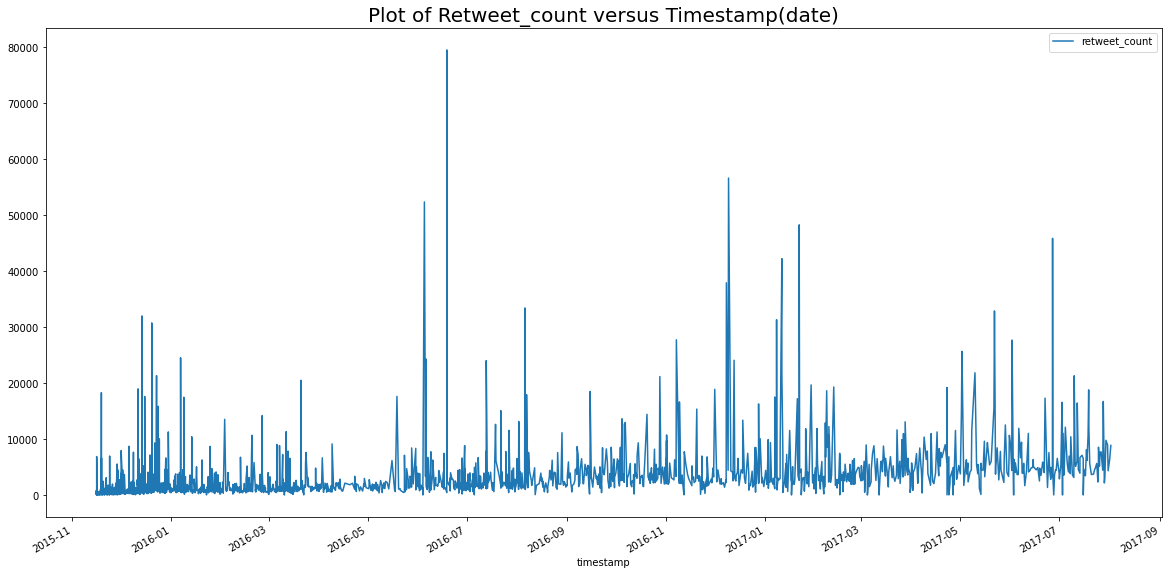

In [64]:
weRateDogsClean.plot(y = "retweet_count", x = "timestamp", kind = "line", figsize=(20,10));
plt.title("Plot of Retweet_count versus Timestamp(date)", fontsize=20);

### The highest retweet_count was recorded in July 2016.